<a href="https://colab.research.google.com/github/Shintaro-Osuga/SGD/blob/main/SGD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install python-mnist

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from mnist import MNIST
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# load dataset
# download files from http://yann.lecun.com/exdb/mnist/
mndata = MNIST('./')
mndata.gz = True # use if gunzip didn't work/you only keep the files in .gz
X_train, labels_train = map(np.array, mndata.load_training())
X_test, labels_test = map(np.array, mndata.load_testing())
X_train = X_train/255.0
X_test = X_test/255.0
labels_train = labels_train.astype(float)
labels_test = labels_test.astype(float)

In [ ]:
# for breaking apart the data, see the following
# boolean indexing:
labels_train_bool = np.logical_or(labels_train == 7, labels_train == 2)
labels_test_bool = np.logical_or(labels_test == 7, labels_test == 2)
# X_train_bool = np.logical_or(X_train == 7, X_train == 2)
# X_test_bool = np.logical_or(X_test == 7, X_test == 2)
# logical operations on arrays
# np.logical_or

In [ ]:
labels_train = labels_train[np.where(labels_train_bool == True)]
X_train = X_train[np.where(labels_train_bool == True)]
labels_test = labels_test[np.where(labels_test_bool == True)]
X_test = X_test[np.where(labels_test_bool == True)]

In [ ]:
labels_train = np.where(labels_train == 7, 1, -1)
labels_test = np.where(labels_test == 7, 1, -1)

In [ ]:
w = np.zeros(len(X_train[0]))
w = w.reshape(len(w),1)
labels_train = labels_train.reshape(len(labels_train),1)
b = 0
labels_test = labels_test.reshape(len(labels_test),1)

### 2.2 Gradient Descent Implementation

In [ ]:
def grad_descent(step_size, w, b, X, y, iter, lamb):
  y_new = np.reshape(y,(len(y),1))
  b = 0
  n=len(X)
  cost = []
  error = []
  for x in range(iter):
    # print(y.shape)
    # print(X.shape)
    # print(w.shape)
    # print(b)
    z = -y*(b+X.dot(w))
    phi_z = sigmoid_func(z)
    y_pred = sigmoid_func(b+X@w)
    
    grad_w = (-1/n)*(np.dot(X.T,(phi_z*y)) + 2*lamb*w)
    grad_b = (-1/n)*np.sum(phi_z*y)

    b = b - (step_size*grad_b)
    w = w - (step_size*grad_w)

    cost.append(calc_cost(X,w,z,lamb))
    error.append(calc_error(y_pred, y))
    
  return w, b, np.asarray(cost), np.asarray(error)

In [ ]:
def sigmoid_func(z):
  return 1/(1+np.exp(-z))

def calc_error(y_pred, y_label):
  truth = np.where(np.where(y_pred >= 0.5, 1, -1) == y_label, 1, 0)
  truth_count = np.count_nonzero(truth)

  if truth_count == 0:
    return 1
  return 1-truth_count/len(y_label)

def calc_cost(x, w, z, lamb):
  return np.sum(np.log(1+np.exp(z)) + lamb*(np.linalg.norm(w,2)**2))/len(x)

In [ ]:
ow, ob, cost, error = grad_descent(0.001, w, b, X_train, labels_train, 500, 0.1)

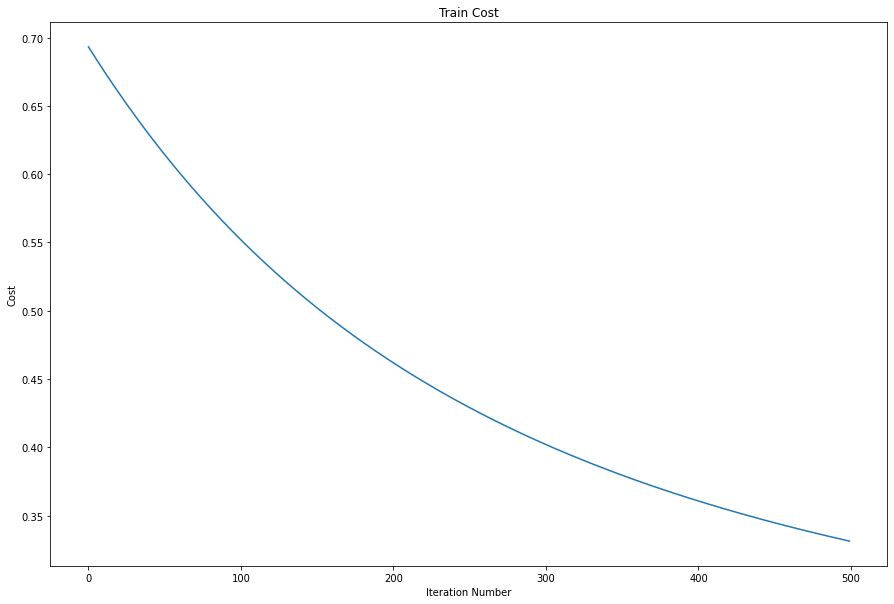

In [ ]:
plt.figure(figsize=(15,10))
plt.plot(cost)
plt.xlabel("Iteration Number")
plt.title("Train Cost")
plt.ylabel("Cost");

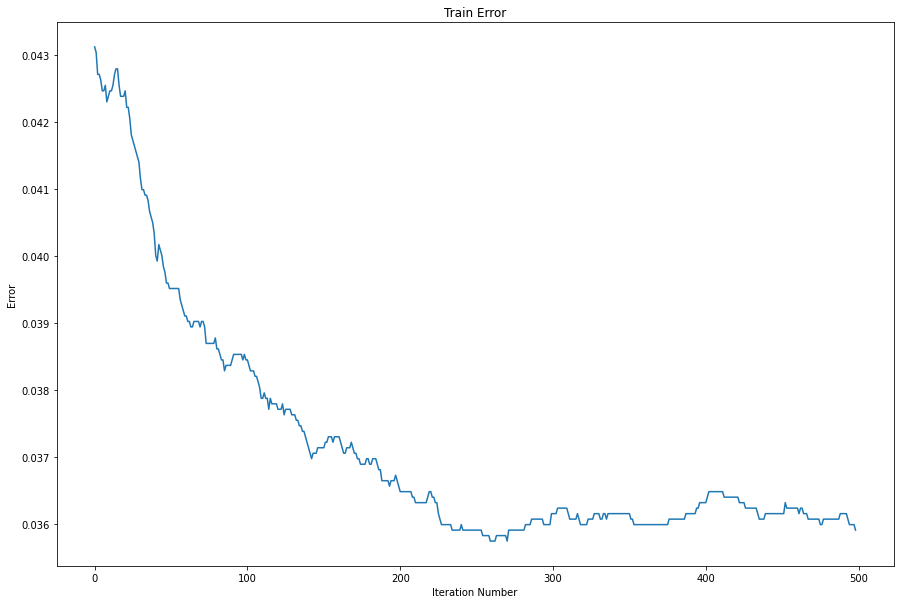

In [ ]:
plt.figure(figsize=(15,10))
plt.plot(error[1:])
plt.xlabel("Iteration Number")
plt.title("Train Error")
plt.ylabel("Error");

In [ ]:
tow, tob, tcost, terror = grad_descent(0.001, w, b, X_test, labels_test, 500, 0.1)

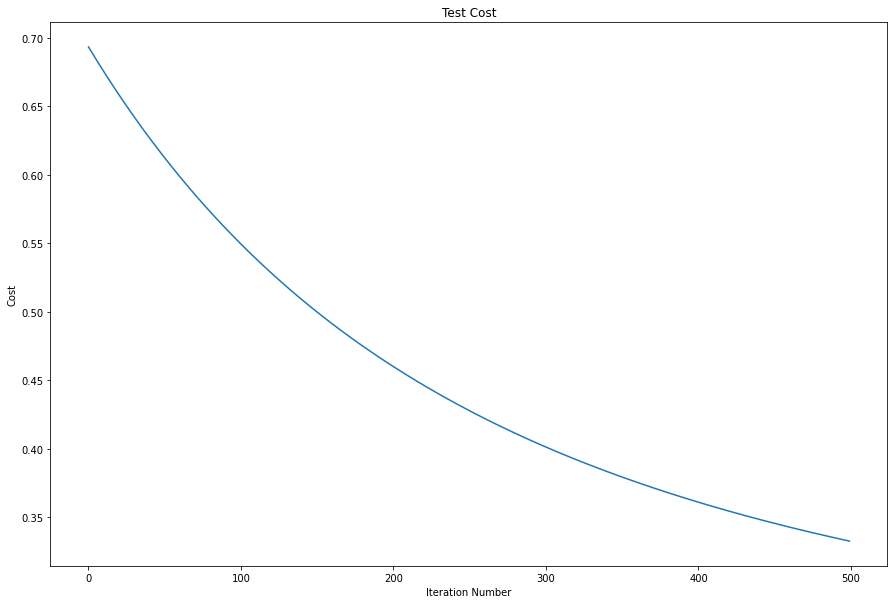

In [ ]:
plt.figure(figsize=(15,10))
plt.plot(tcost)
plt.xlabel("Iteration Number")
plt.title("Test Cost")
plt.ylabel("Cost");

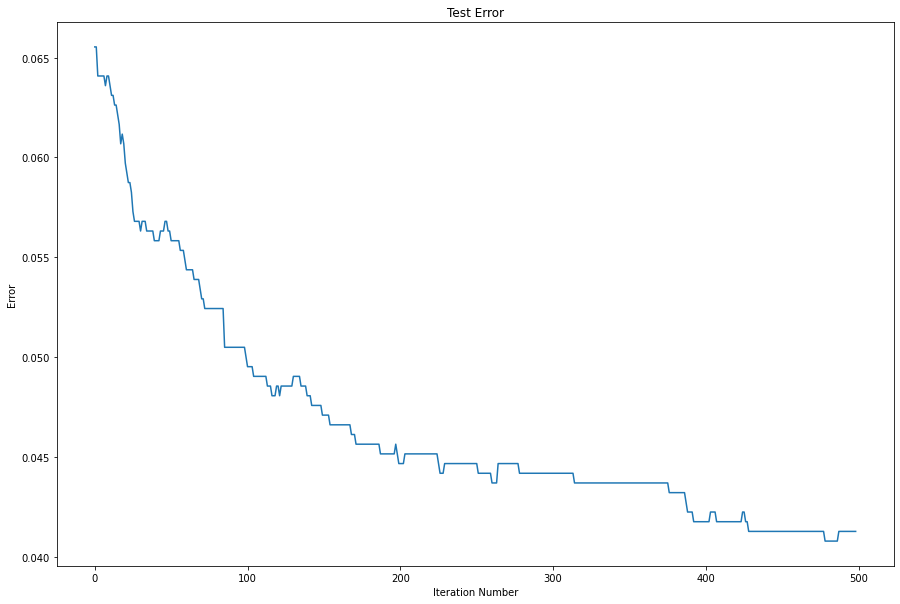

In [ ]:
plt.figure(figsize=(15,10))
plt.plot(terror[1:])
plt.xlabel("Iteration Number")
plt.title("Test Error")
plt.ylabel("Error");

### 2.3 Stochastic Gradient Descent

In [ ]:
w.shape

(784, 1)

In [ ]:
def SGD(batch_size, batch, X, y, w, b, step_size, lamb, iter):
  b_w = []
  b_b = []
  b_cost = []
  b_error = []
  avg_cost = []
  b_raw_error = []
  w = np.zeros(batch_size).reshape(batch_size, 1)
  for x in range(batch):
    inner_cost = []
    inner_error = []
    index = np.arange(len(X))
    temp = np.random.choice(index, batch_size, replace=False)

    temp_x = np.take(X, temp, axis=0)
    X = np.delete(X, temp, axis=0)
    temp_y = np.take(y, temp, axis=0)
    y = np.delete(y, temp, axis=0)
    for k in range(len(np.asarray(temp_x[0]))):
      batch_one_x = np.array([temp_x[0][k]])
      batch_one_y= np.array([temp_y[0][0]])
      batch_one_w = np.array([w[0][0]]).reshape(1,1)
      w[0][0], b, temp_cost, temp_error = grad_descent(step_size, batch_one_w, b, batch_one_x, batch_one_y, 1, lamb)

      inner_cost.append(temp_cost)
      inner_error.append(temp_error)

    b_cost.append(inner_cost)
    b_error.append(np.mean(inner_error))
    b_raw_error.append(inner_error)
    b_w.append(w)
    b_b.append(b)
    avg_cost.append(np.mean(inner_cost))
  return b_b, b_w, np.asarray(b_cost), np.asarray(b_error), np.asarray(avg_cost), b_raw_error

In [ ]:
ob,ow,oc,oe, avg, raw_error = SGD(1, 1, X_train, labels_train, w, b, 0.001, 0.1, 100)

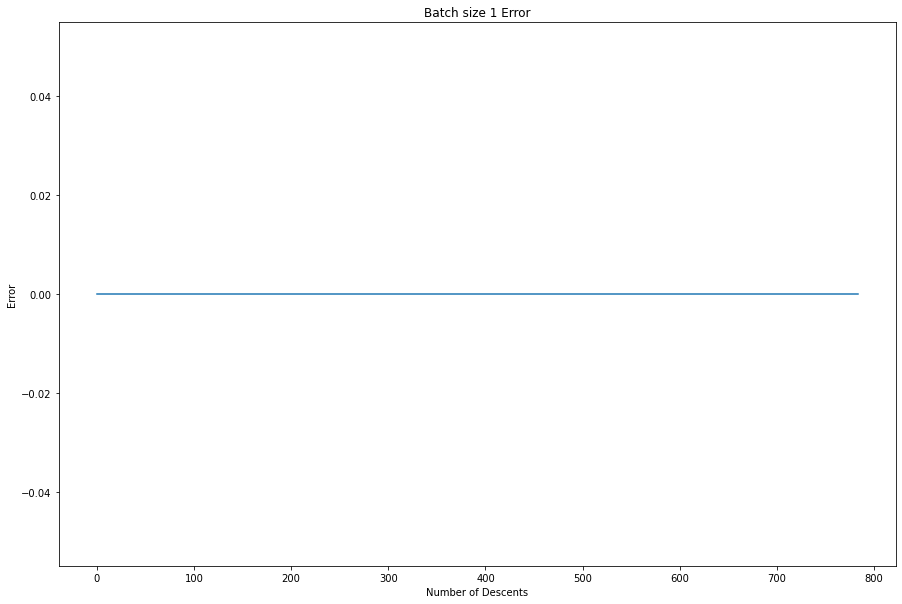

In [ ]:
plt.figure(figsize=(15,10))
plt.plot(raw_error[0])
plt.xlabel("Number of Descents")
plt.title("Batch size 1 Error")
plt.ylabel("Error");


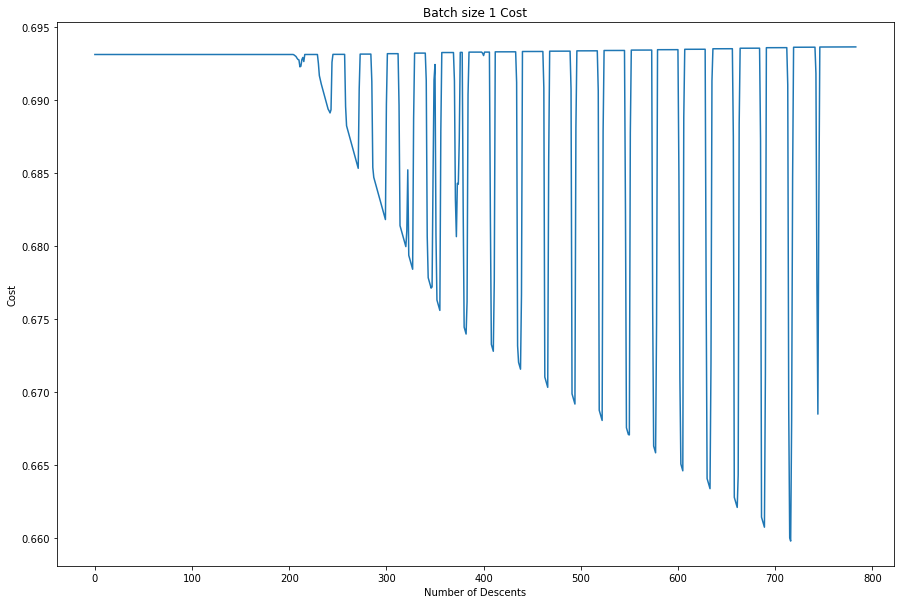

In [ ]:
plt.figure(figsize=(15,10))
plt.plot(oc[0])
plt.xlabel("Number of Descents")
plt.title("Batch size 1 Cost")
plt.ylabel("Cost");

### 2.4

In [ ]:
ob,ow,oc,oe, avg, raw_error = SGD(100, 100, X_train, labels_train, w, b, 0.001, 0.1, 500)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: RuntimeWarning: overflow encountered in exp
  del sys.path[0]


This can be interpretted as the mod 100 :)`

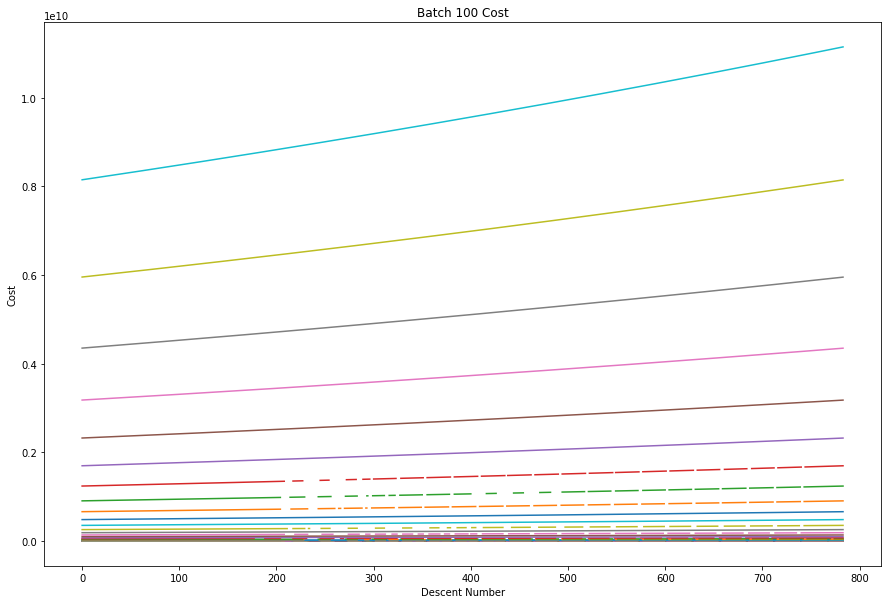

In [ ]:
plt.figure(figsize=(15,10))
plt.plot(oc.T[0])
plt.title("Batch 100 Cost")
plt.xlabel("Descent Number")
plt.ylabel("Cost");

In [ ]:
avg

array([6.90000907e-01, 6.80336815e-01, 7.08337476e-01, 6.76284922e-01,
       6.90011714e-01, 7.26873404e-01, 7.22788054e-01, 7.22630489e-01,
       7.29190115e-01, 7.29432368e-01, 6.84016783e-01, 7.45356123e-01,
       6.93416500e-01, 6.94977942e-01, 7.91890539e-01, 8.09630016e-01,
       8.33284112e-01, 8.28690517e-01, 7.56101832e-01, 7.85805525e-01,
       1.06440489e+00, 1.12078502e+00, 9.73937607e-01, 1.04917501e+00,
       1.23758286e+00, 1.50463499e+00, 1.83119446e+00, 2.25825916e+00,
       3.34080825e+00, 3.70168633e+00, 5.37738684e+00, 6.96090101e+00,
       8.32385802e+00, 1.25739226e+01, 1.57699506e+01, 1.97259496e+01,
       2.67713132e+01, 4.06795074e+01, 4.85630980e+01, 6.63027338e+01,
       9.32505735e+01, 1.22969400e+02, 1.72289686e+02, 2.28729328e+02,
       3.15868387e+02, 4.34576336e+02, 5.82550259e+02, 8.01616885e+02,
       1.08902639e+03, 1.50488659e+03, 2.03494258e+03, 2.78415867e+03,
       3.80937997e+03, 5.21221934e+03, 7.13158149e+03, 9.75796508e+03,
      

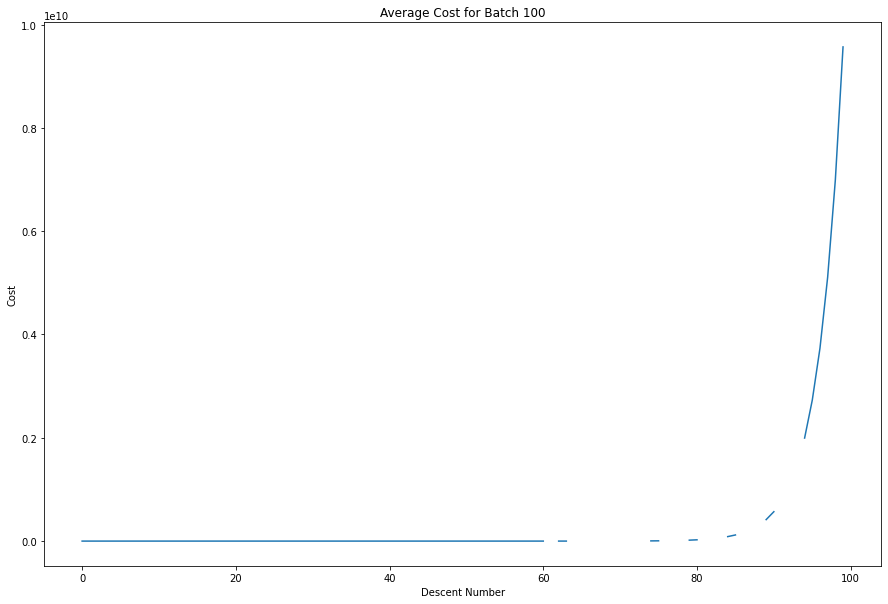

In [ ]:
plt.figure(figsize=(15,10))
plt.plot(avg)
plt.title("Average Cost for Batch 100")
plt.xlabel("Descent Number")
plt.ylabel("Cost");

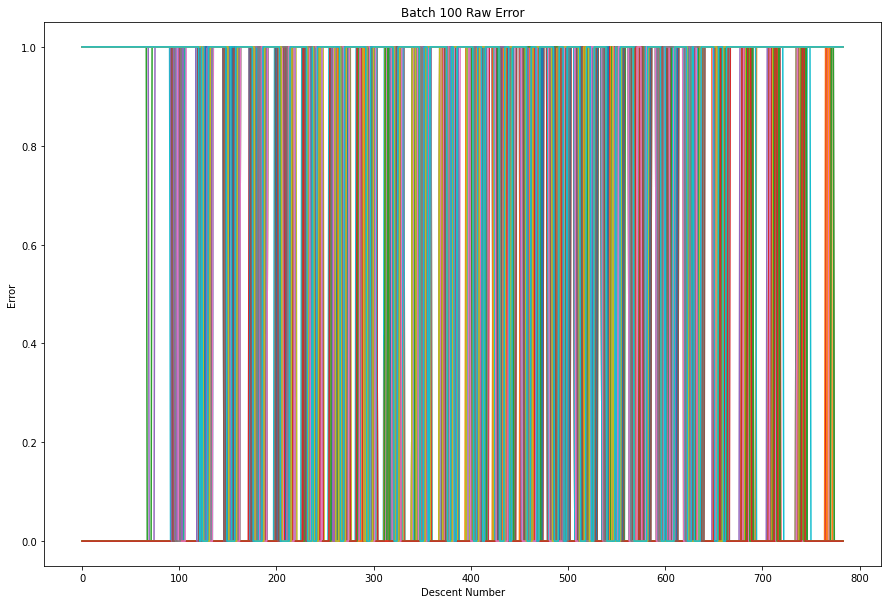

In [ ]:
plt.figure(figsize=(15,10))
plt.plot(np.asarray(raw_error).T[0])
plt.title("Batch 100 Raw Error")
plt.xlabel("Descent Number")
plt.ylabel("Error");

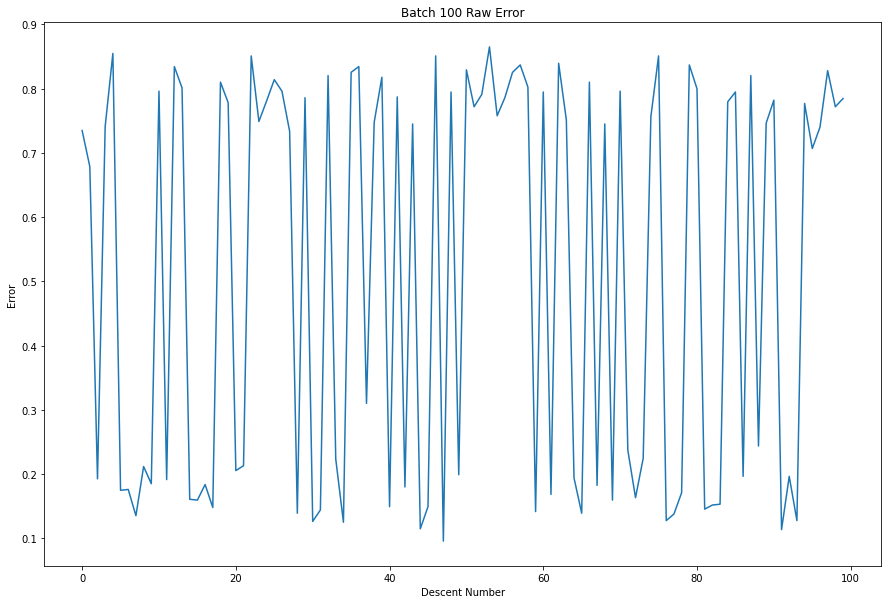

In [ ]:
plt.figure(figsize=(15,10))
plt.plot(oe)
plt.title("Batch 100 Average Error")
plt.xlabel("Descent Number")
plt.ylabel("Error");

### Problem 3

### 3.1

In [ ]:
def val_train_split(X, y, percentage):
  reserve_num = round(len(X)*(percentage/100))
  index = np.arange(len(X))
  temp = np.random.choice(index, reserve_num, replace=False)
  # print(temp)
  # print(X)
  train_x = np.take(X, temp, axis=0)
  # print(train_x)
  train_y = np.take(y, temp, axis=0)
  val_x = np.delete(X, temp, axis=0)
  val_y = np.delete(y, temp, axis=0)
  return train_x, train_y, val_x, val_y

In [ ]:
p = 3000
n = len(X_train[0])
sigma = np.logspace(-3, 2, p)
sigma = sigma.reshape(len(sigma),1)
c = np.random.uniform(0, 2*np.pi, p)
G = np.random.randn(p, n)*np.sqrt(sigma[0])
H_train = np.cos(X_train@G.T + c)

In [ ]:
sigma.shape

(3000, 1)

In [ ]:
G.shape

(3000, 784)

In [ ]:
train_h, htrain_y, val_x, val_y = val_train_split(H_train, labels_train, 80)

In [ ]:
htrain_y.shape

In [ ]:
h_b, h_w, h_cost, h_error = grad_descent(0.001, sigma, c, train_h, htrain_y, 500, 0.1)

In [ ]:
def create_h(s, X, y):
  all_x = []
  all_y = []
  p = 3000
  n = len(X_train[0])
  sigma = s
  sigma = sigma.reshape(len(sigma),1)
  c = np.random.uniform(0, 2*np.pi, p)
  for x in range(len(sigma)):
    G = np.random.randn(p, n)*np.sqrt(sigma[x])
    H_train = np.cos(X_train@G.T + c)
    train_h, htrain_y, val_x, val_y = val_train_split(H_train, y, 80)
    all_x.append(train_h)
    all_y.append(htrain_y)
    if x%10 == 0:
      print(x)
  return np.asarray(all_x), np.asarray(all_y)

In [ ]:
import numba as nb
from numba import jit
from numba import njit
from numba import prange
numba_create = jit(create_h)

In [ ]:
xs, ys = numba_create(sigma[:10], X_train, labels_train)

In [ ]:
sigma.shape

In [ ]:
numba_gd = jit(grad_descent)

In [ ]:
def sigma_tune(sigma, b, X, y, lamb, step_size, iter):
  s_b = []
  s_w = []
  s_cost = []
  s_error = []
  for x in range(len(sigma)):
    temp_b, temp_w, temp_cost, temp_error = grad_descent(step_size, b, sigma[x], X[x], y[x], iter, lamb)
    print(temp_b.shape)
    print(temp_w.shape)
    print(temp_cost.shape)
    print(temp_error.shape)
    s_b.append(temp_b)
    s_w.append(temp_w)
    s_cost.append(temp_cost)
    s_error.append(temp_error)
  return np.asarray(s_b), np.asarray(s_w), np.asarray(s_cost), np.asarray(s_error)

In [ ]:
numba_s_tune = jit(sigma_tune)

In [ ]:
xs, ys = numba_create(sigma[:5], X_train, labels_train)
sob, sow, soc, soe = sigma_tune(sigma[:5], c.reshape(len(c),1), xs, ys, 0.1, 0.001, 500)

0
(3000, 1)
()
(500,)
(500,)
(3000, 1)
()
(500,)
(500,)
(3000, 1)
()
(500,)
(500,)
(3000, 1)
()
(500,)
(500,)
(3000, 1)
()
(500,)
(500,)


In [ ]:
np.asarray(soe).shape

(5, 500)

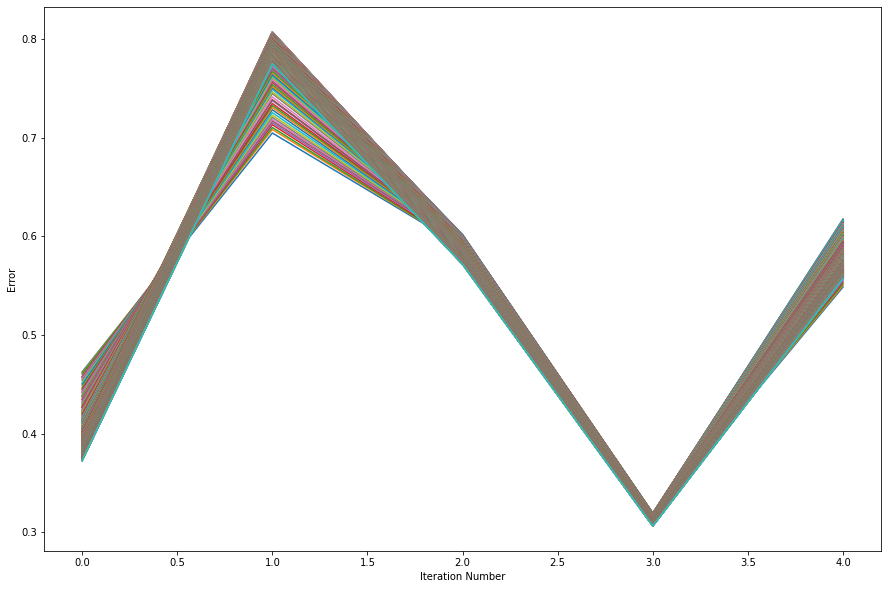

In [ ]:
plt.figure(figsize=(15,10))
plt.plot(soe)
plt.xlabel("Iteration Number")
plt.ylabel("Error");

In [ ]:
h_error